In [37]:
import os
import wfdb
import numpy as np
import pandas as pd
import scipy.signal
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
def extract_label(record_metadata):
  dx_code = record_metadata.comments[2].split(": ")[1]
  return 1 if '53741008' in dx_code else 0

def load_and_normalize_ecg(mat_file):
  data = loadmat(mat_file)
  ecg_signal = np.array(data['val'])

  scaler = MinMaxScaler(feature_range=(-1, 1))
  normalized_ecg = scaler.fit_transform(ecg_signal.T).T

  return normalized_ecg

def downsample_ecg(ecg_data, factor=8):
  downsampled = scipy.signal.resample(ecg_data, ecg_data.shape[1] // factor, axis=1)
  return downsampled

In [27]:
dataset_path = "Training_PTB"

processed_data = []

for file in os.listdir(dataset_path):
  if file.endswith(".hea"):
    record_name = file.replace(".hea", "")
    hea_file_path = os.path.join(dataset_path, f"{record_name}.hea")
    mat_file_path = os.path.join(dataset_path, f"{record_name}.mat")

    if os.path.exists(mat_file_path):
      record_metadata = wfdb.rdheader(hea_file_path.replace(".hea", ""))
      label = extract_label(record_metadata)

      normalized_ecg = load_and_normalize_ecg(mat_file_path)
      downsampled_ecg = downsample_ecg(normalized_ecg)

      mean_values = np.mean(downsampled_ecg, axis=1)

      processed_data.append(np.append(mean_values, [label, record_name]))

columns = [f"lead_{i}" for i in range(12)] + ["label", "record_name"]
df = pd.DataFrame(processed_data, columns=columns)

df

,lead_0,lead_1,lead_2,lead_3,lead_4,lead_5,lead_6,lead_7,lead_8,lead_9,lead_10,lead_11,label,record_name
0,-0.014281217294610134,0.10807578209277251,0.13607082410142807,-0.06044286584341403,-0.07905981003265061,0.18445160864978913,-0.4558979203173677,-0.37096506863006395,-0.30986236598000244,-0.0946332613193768,0.2622335113065327,0.24280264857881131,0,S0001
1,0.06883331698063846,-0.0778201358096377,-0.07153663464470873,0.07357236774918297,0.08564456820480193,-0.07557134825009526,-0.1866208281209906,-0.28074970913321695,-0.264798460422541,-0.09667408335755101,0.15050828889491433,0.040327620384826554,0,S0002
2,-0.19047705705316517,0.09543306015526837,0.20063431478064772,0.019371282220753357,-0.10531577018956824,0.20461466572994727,-0.1519793323747757,-0.27131764722797336,-0.2336100235241042,-0.09723427369774189,0.1940334348874055,0.28447075925215326,0,S0003
3,0.22428522355912056,0.32128977272727277,0.2576570427447997,-0.3635839099820936,-0.0830431012629056,0.30059258495981,-0.10193043325676368,-0.04924921531112447,0.20962937081477442,0.0888288812785388,-0.11687839315833864,-0.2823859862699547,0,S0004
4,-0.14486413311624238,0.1209624826634219,0.23711841378039789,0.06903813127724075,-0.05741192540891142,0.2672626231100014,0.006549772468714355,-0.0727612286759306,-0.25575127206645903,-0.5753090232255363,-0.5708762804389035,-0.24051557687751712,0,S0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,-0.7047762853862243,-0.1592416513174119,0.2366042083236391,0.29369453356508946,-0.461752266630982,0.0871067108846059,0.14204234685811665,-0.300050513322591,-0.08338902850775641,0.07440830537255064,0.12302598640845133,0.04131461324430878,0,S0545
512,-0.1946862902875709,0.0649397341122981,0.20833781521960426,0.05796633327603786,-0.20602565125750427,0.1622914260937206,0.2990597877785837,0.3130621051325184,0.31711501938633124,-0.00040957666048818073,-0.04179960597734699,-0.019346917689183382,0,S0546
513,0.12370157386296995,0.18540863956045256,0.10309171177225582,-0.21788685444690978,-0.07607156699051816,0.09667609808887562,0.515606675148088,0.15204630248240075,-0.060818983945226876,-0.06101551943104363,-0.18367054422085577,-0.4154232115296474,0,S0547
514,-0.5080834708727394,-0.5135348512589439,0.416561446223747,0.5267905204686241,-0.47468150594793235,0.13307225762779373,0.6618199491181992,0.6273688729758577,0.4676366123414966,0.045415857027815525,-0.43196007551099325,-0.5392017634201864,0,S0548


In [28]:
df.head()

,lead_0,lead_1,lead_2,lead_3,lead_4,lead_5,lead_6,lead_7,lead_8,lead_9,lead_10,lead_11,label,record_name
0,-0.014281217294610134,0.10807578209277251,0.13607082410142807,-0.06044286584341403,-0.07905981003265061,0.18445160864978913,-0.4558979203173677,-0.37096506863006395,-0.30986236598000244,-0.0946332613193768,0.2622335113065327,0.24280264857881131,0,S0001
1,0.06883331698063846,-0.0778201358096377,-0.07153663464470873,0.07357236774918297,0.08564456820480193,-0.07557134825009526,-0.1866208281209906,-0.28074970913321695,-0.264798460422541,-0.09667408335755101,0.15050828889491433,0.040327620384826554,0,S0002
2,-0.19047705705316517,0.09543306015526837,0.20063431478064772,0.019371282220753357,-0.10531577018956824,0.20461466572994727,-0.1519793323747757,-0.27131764722797336,-0.2336100235241042,-0.09723427369774189,0.1940334348874055,0.28447075925215326,0,S0003
3,0.22428522355912056,0.32128977272727277,0.2576570427447997,-0.3635839099820936,-0.0830431012629056,0.30059258495981,-0.10193043325676368,-0.04924921531112447,0.20962937081477442,0.0888288812785388,-0.11687839315833864,-0.2823859862699547,0,S0004
4,-0.14486413311624238,0.1209624826634219,0.23711841378039789,0.06903813127724075,-0.05741192540891142,0.2672626231100014,0.006549772468714355,-0.0727612286759306,-0.25575127206645903,-0.5753090232255363,-0.5708762804389035,-0.24051557687751712,0,S0005


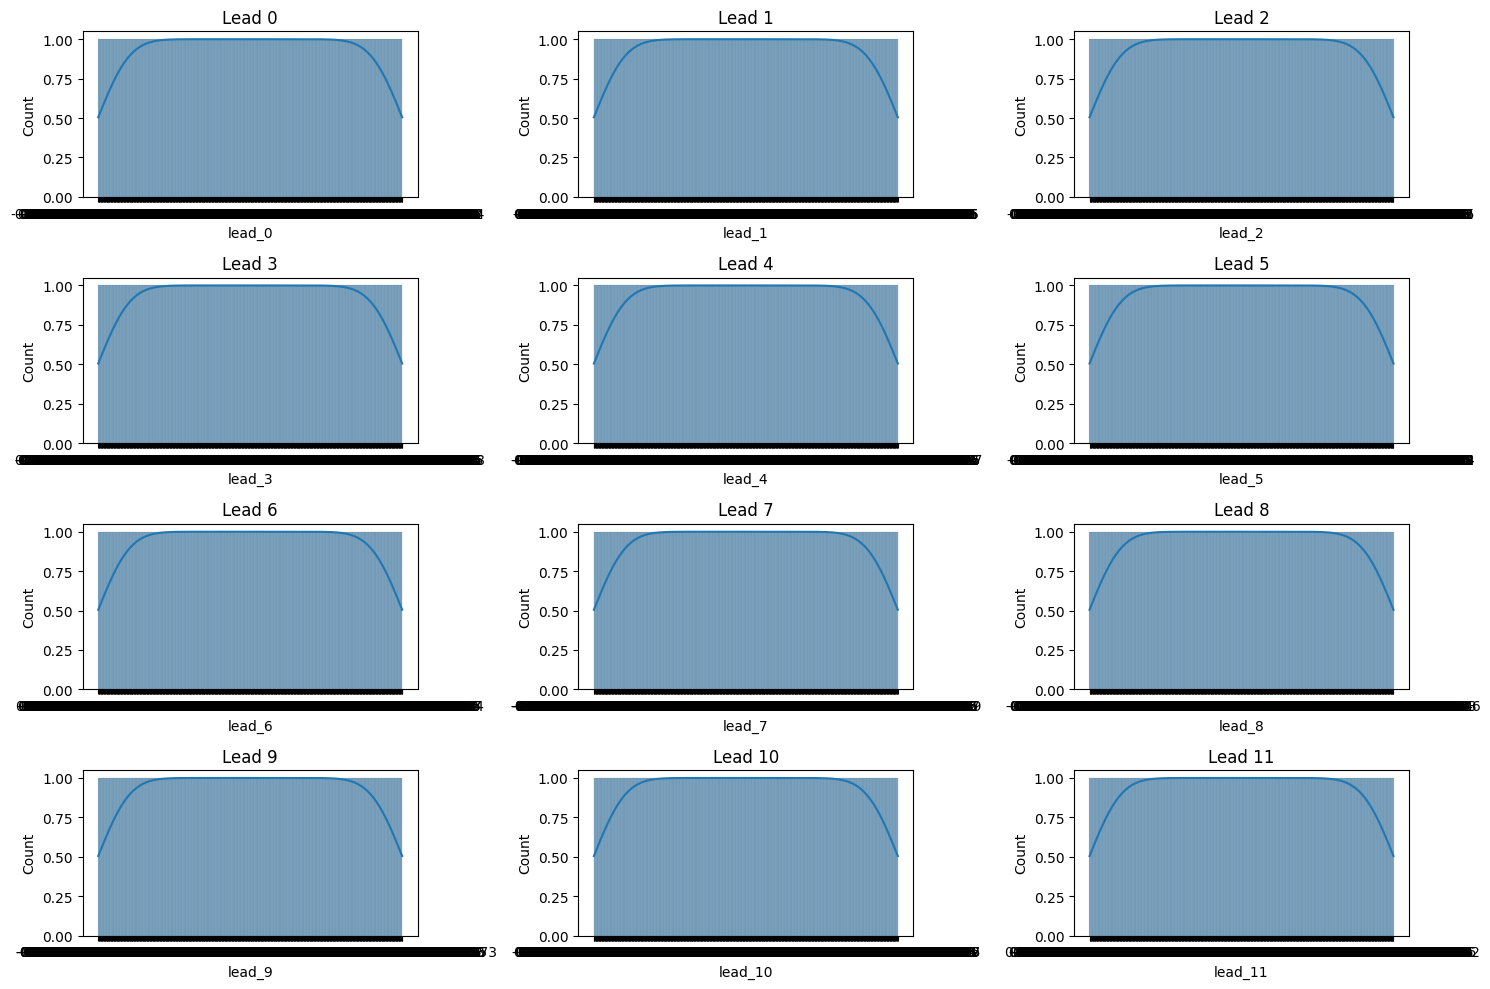

In [29]:
plt.figure(figsize=(15, 10))
for i in range(12):
  plt.subplot(4, 3, i + 1)
  sns.histplot(df[f'lead_{i}'], bins=50, kde=True)
  plt.title(f'Lead {i}')

plt.tight_layout()
plt.show()

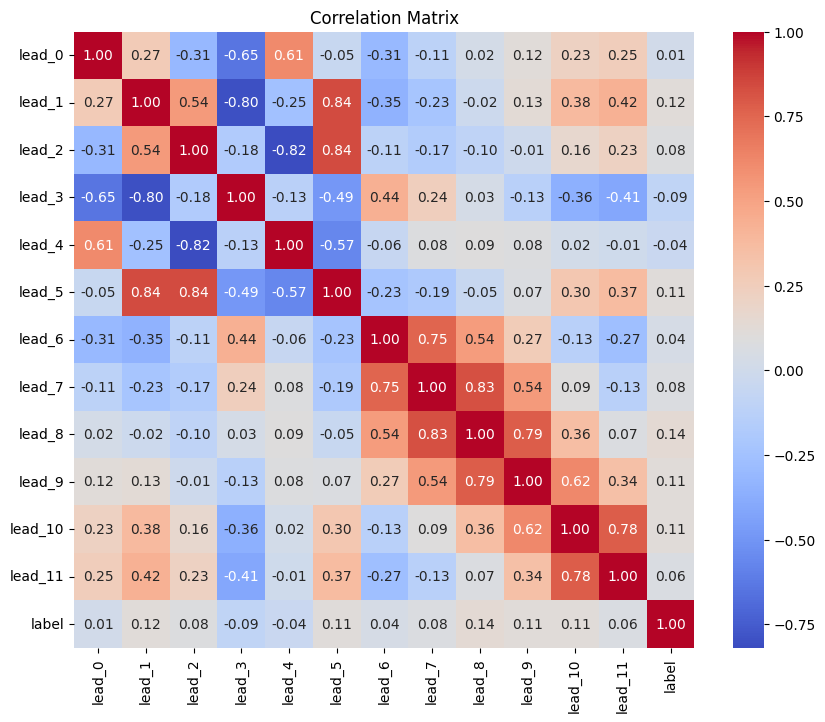

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

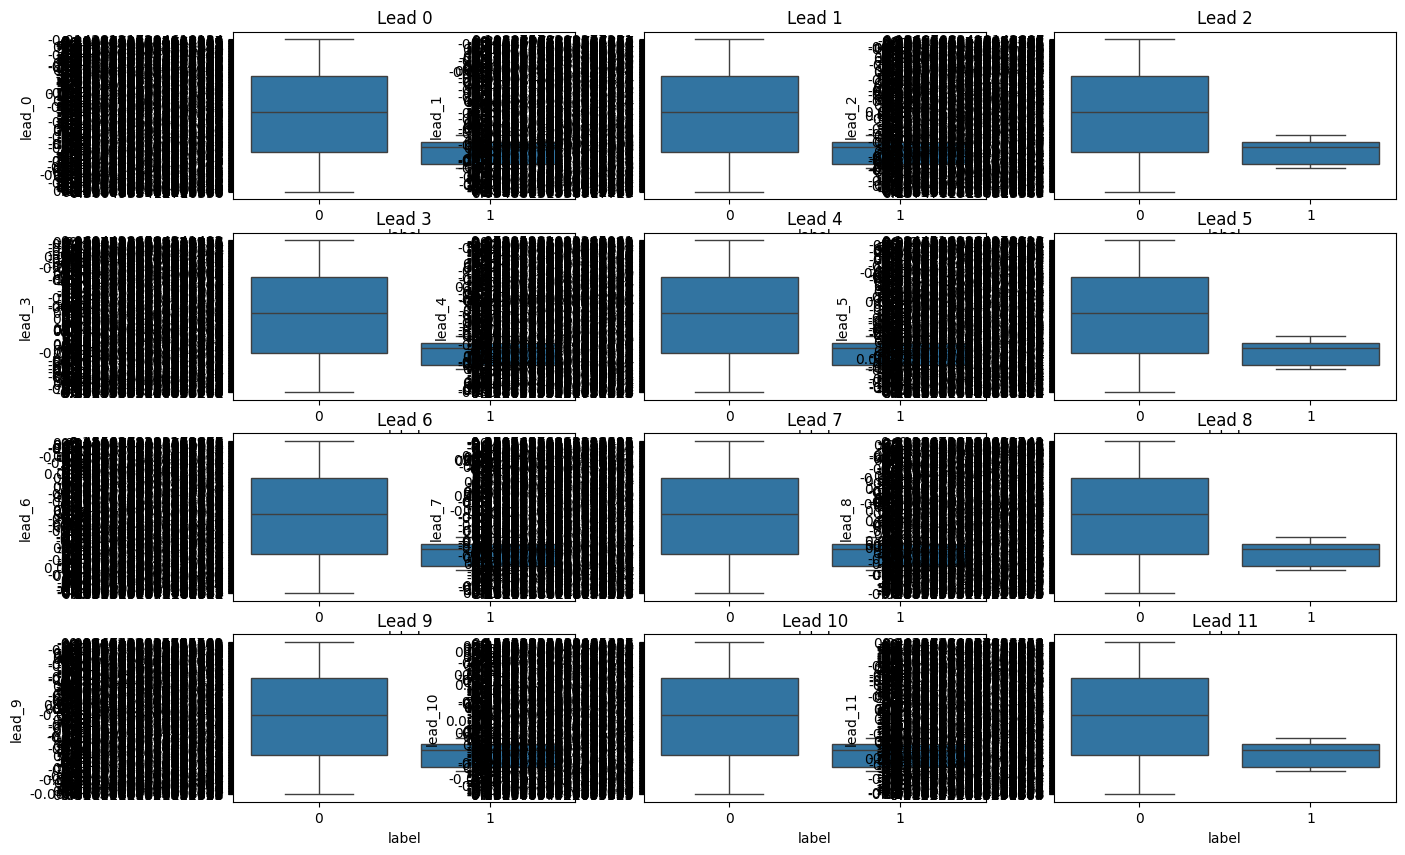

In [34]:
plt.figure(figsize=(15,10))

for i in range(12):
  plt.subplot(4, 3, i + 1)
  sns.boxplot(x='label', y=f'lead_{i}', data=df)
  plt.title(f'Lead {i}')

# plt.tight_layout()
plt.show()

In [38]:
X = df.drop(columns=['label', 'record_name'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


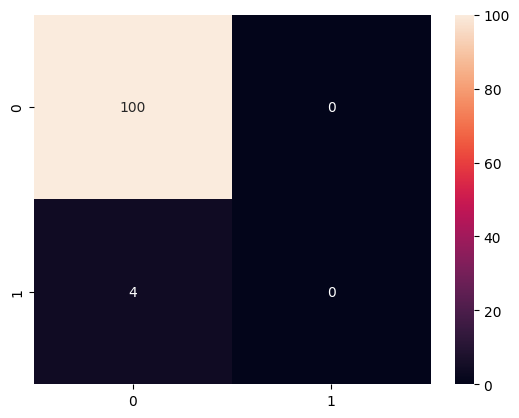

In [46]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [48]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


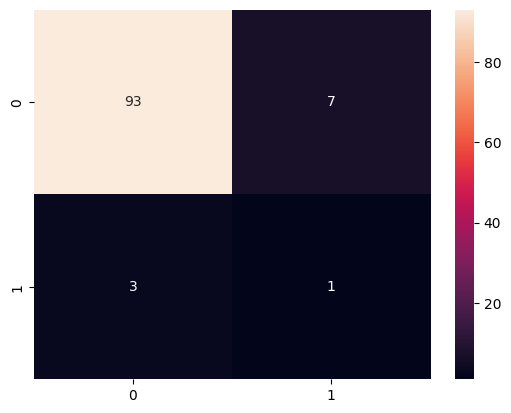

In [49]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()